##### 10 Things You Didn’t Know About Scikit-Learn
…until now

Scikit-learn is one of the most widely used Python machine learning libraries. It has a standardized and simple interface for preprocessing data and model training, optimisation and evaluation.

The project began life as a Google Summer of Code project developed by David Cournapeau and had its first public release in 2010. Since its creation, the library has evolved into a rich ecosystem for the development of machine learning models.

Over time the project has developed many handy functions and capabilities that enhance its ease of use. In this article, I will cover 10 of the most useful features that you might not know about.

In [1]:
# Toy regression data set loading
from sklearn.datasets import load_boston

X,y = load_boston(return_X_y = True)

In [2]:
# Synthetic regresion data set loading
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=10000, noise=100, random_state=0)

In [3]:
from sklearn.datasets import fetch_openml

X,y = fetch_openml("wine", version=1, as_frame=True, return_X_y=True)



In [4]:
from sklearn.dummy import DummyClassifier

# Fit the model on the wine dataset and return the model score
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)

dummy_clf.fit(X, y)

dummy_clf.score(X, y)

0.398876404494382

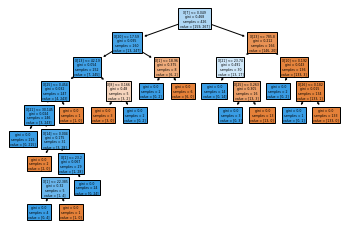

<Figure size 2880x2880 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt 
from sklearn import metrics, model_selection
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_breast_cancer

X,y = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

plot_tree(clf, filled=True)
plt.figure(figsize=(40,40))
plt.show()

#metrics.plot_roc_curve(clf, X_test, y_test)
#plt.show()

In [46]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, chi2

X,y = load_wine(return_X_y = True)

X_trasformed = SelectPercentile(chi2, percentile=60).fit_transform(X, y)



In [7]:
from sklearn.datasets import fetch_openml

X,y = fetch_openml("auto93", version=1, as_frame=True, return_X_y=True)


In [10]:
X.dtypes

Manufacturer                     category
Type                             category
City_MPG                          float64
Highway_MPG                       float64
Air_Bags_standard                category
Drive_train_type                 category
Number_of_cylinders               float64
Engine_size                       float64
Horsepower                        float64
RPM                               float64
Engine_revolutions_per_mile       float64
Manual_transmission_available    category
Fuel_tank_capacity                float64
Passenger_capacity                float64
Length                            float64
Wheelbase                         float64
Width                             float64
U-turn_space                      float64
Rear_seat_room                    float64
Luggage_capacity                  float64
Weight                            float64
Domestic                         category
dtype: object

In [14]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X,y = fetch_openml("auto93", version=1, as_frame=True, return_X_y=True)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


In [17]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load auto93 data set which contains both categorical and numeric features
X,y = fetch_openml("auto93", version=1, as_frame=True, return_X_y=True)

# Create lists of numeric and categorical features  
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

# Create a numeric and categorical transformer to perform preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Use the ColumnTransformer to apply to the correct features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append regressor to the preprocessor
lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

# Fit the complete pipeline
lr.fit(X_train, y_train)
print("model score: %.3f" % lr.score(X_test, y_test))

model score: 0.766


In [18]:
from sklearn import set_config

set_config(display='diagram')   

lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['City_MPG', 'Highway_MPG', 'Number_of_cylinders', 'Engine_size',
       'Horsepower', 'RPM', 'Engine_revolutions_per_mile',
       'Fuel_tank_capacity', 'Passenger_capacity', 'Length', 'Wheelbase',
       'Width', 'U-turn_space', 'Rear_seat_room', 'Luggage_capacity',
       'Weight'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', LinearRegression())])

In [39]:
# Pipeline using Weight of Evidence transformer from category encoders

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import category_encoders as ce

# Load auto93 data set which contains both categorical and numeric features
X,y = fetch_openml("auto93", version=1, as_frame=True, return_X_y=True)

# Create lists of numeric and categorical features  
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

# Create a numeric and categorical transformer to perform preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('woe', ce.woe.WOEEncoder())])

# Use the ColumnTransformer to apply to the correct features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append regressor to the preprocessor
lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

# Fit the complete pipeline
lr.fit(X_train, y_train)
print("model score: %.3f" % lr.score(X_test, y_test))

model score: 0.766
